# Import Data

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv("Ming1Jul67_total_order.csv")
df.head(5)

,order_completed_at,unique_order_count
0,2023-01-01,15
1,2023-01-02,32
2,2023-01-03,89
3,2023-01-04,73
4,2023-01-05,67


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_completed_at  548 non-null    object
 1   unique_order_count  548 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ KB
None


In [7]:
start_date = df["order_completed_at"].head(1).iloc[0]
end_date   = df["order_completed_at"].tail(1).iloc[0]
print(f"{start_date} to {end_date}")

2023-01-01 to 2024-07-01


In [8]:
df['order_completed_at'] = pd.to_datetime(df['order_completed_at'])

# Data Processing

### Split 80 Percen %

In [9]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(df) * .8)
training_data_len 
 
#Splitting the dataset
train_data = df[:training_data_len].iloc[:,1:2] 
test_data = df[training_data_len:].iloc[:,1:2]
print(train_data.shape, test_data.shape)

(439, 1) (109, 1)


### Split By Date

In [10]:
import pandas as pd

# สมมติว่า df เป็น DataFrame ที่มีคอลัมน์ 'Date' เป็น index
# และมีข้อมูลอื่นๆ ในคอลัมน์ถัดไป

# กำหนดวันที่ตัด
cut_off_date = '2024-05-01'

# แบ่งข้อมูล
train_data = df[df.order_completed_at < cut_off_date].iloc[:, 1:2]
test_data = df[df.order_completed_at >= cut_off_date].iloc[:, 1:2]

print(train_data.shape, test_data.shape)

# ถ้าต้องการดูช่วงวันที่ของแต่ละชุดข้อมูล
print("Train data range:", train_data.index.min(), "to", train_data.index.max())
print("Test data range:", test_data.index.min(), "to", test_data.index.max())

(486, 1) (62, 1)
Train data range: 0 to 485
Test data range: 486 to 547


In [11]:
train_data

,unique_order_count
0,15
1,32
2,89
3,73
4,67
...,...
481,144
482,115
483,137
484,126


In [12]:
# Selecting Open Price values
dataset_train = train_data.unique_order_count.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(486, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
 
print(scaled_train[:5])

[[0.004363  ]
 [0.01919721]
 [0.06893543]
 [0.05497382]
 [0.04973822]]


In [14]:
# Selecting Open Price values
dataset_test = test_data.unique_order_count.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[0.3258427] [0.95505618] [0.49438202] [0.46067416] [1.]


In [15]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.004363  , 0.01919721, 0.06893543, 0.05497382, 0.04973822,
       0.05671902, 0.03664921, 0.03403141, 0.02705061, 0.05846422,
       0.05322862, 0.05061082, 0.03926702, 0.03752182, 0.04624782,
       0.19982548, 0.2513089 , 0.20418848, 0.11518325, 0.01570681,
       0.        , 0.0017452 , 0.01745201, 0.02792321, 0.04712042,
       0.02356021, 0.02530541, 0.04886562, 0.02356021, 0.02705061,
       0.06457243, 0.03403141, 0.52268761, 0.02705061, 0.02966841,
       0.02792321, 0.05148342, 0.04624782, 0.02443281, 0.03752182,
       0.02443281, 0.03141361, 0.11518325, 0.07940663, 0.10122164,
       0.02879581, 0.06893543, 0.03577661, 0.01832461, 0.008726  ])]
[0.02617801047120419]

[array([0.004363  , 0.01919721, 0.06893543, 0.05497382, 0.04973822,
       0.05671902, 0.03664921, 0.03403141, 0.02705061, 0.05846422,
       0.05322862, 0.05061082, 0.03926702, 0.03752182, 0.04624782,
       0.19982548, 0.2513089 , 0.20418848, 0.11518325, 0.01570681,
       0.        , 0.0017452 , 0.01

In [16]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [17]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (436, 50, 1) y_train : (436, 1)


In [18]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (12, 50, 1) y_test : (12, 1)


In [21]:
print(X_test[0])

[[0.3258427 ]
 [0.95505618]
 [0.49438202]
 [0.46067416]
 [1.        ]
 [0.39325843]
 [0.64044944]
 [0.62921348]
 [0.52808989]
 [0.28089888]
 [0.42696629]
 [0.17977528]
 [0.34831461]
 [0.33707865]
 [0.20224719]
 [0.15730337]
 [0.31460674]
 [0.35955056]
 [0.29213483]
 [0.66292135]
 [0.16853933]
 [0.37078652]
 [0.38202247]
 [0.20224719]
 [0.37078652]
 [0.2247191 ]
 [0.        ]
 [0.69662921]
 [0.43820225]
 [0.40449438]
 [0.66292135]
 [0.49438202]
 [0.6741573 ]
 [0.29213483]
 [0.42696629]
 [0.2247191 ]
 [0.58426966]
 [0.43820225]
 [0.29213483]
 [0.19101124]
 [0.16853933]
 [0.38202247]
 [0.42696629]
 [0.37078652]
 [0.42696629]
 [0.56179775]
 [0.35955056]
 [0.17977528]
 [0.2247191 ]
 [0.4494382 ]]


In [2]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Modeling 

In [ ]:
# initializing the RNN
regressor = Sequential()
 
# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add( SimpleRNN(units = 50))
 
# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))
 
# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20


d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0205
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0178
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0163
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0244
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0112
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0112
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0106
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0107
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0077
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0068
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0147
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0099
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0110
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0095
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [ ]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
                       return_sequences = False))
regressorLSTM.add(Dense(25))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12


d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0153
Epoch 2/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0098
Epoch 3/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0058
Epoch 4/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0111
Epoch 5/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0111
Epoch 6/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0086 - loss: 0.0090
Epoch 7/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0092
Epoch 8/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0021 - loss: 0.0087
Epoch 9/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0011 - loss: 0.0062 
Epoch 10/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0013 - loss: 0.0066
Epoch 11/12
389/389 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 5.7136e-04 - loss: 0.0098
Epoch 12/12
389/389 ━━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [ ]:
#Initialising the model
regressorGRU = Sequential()
 
# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     activation='tanh'))
 
# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
                                   decay=1e-7, 
                                   momentum=0.9, 
                                   nesterov=False),
                     loss='mean_squared_error')
 
# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()

Epoch 1/20


d:\Ming\ProgramLang_And_IDE\Python67\pythonVenv\MachineLearning\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


389/389 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0347
Epoch 2/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0344
Epoch 3/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0316
Epoch 4/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0384
Epoch 5/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0382
Epoch 6/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0296
Epoch 7/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0314
Epoch 8/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0355
Epoch 9/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0328
Epoch 10/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0369
Epoch 11/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0306
Epoch 12/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0350
Epoch 13/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0325
Epoch 14/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0333
Epoch 15/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

In [ ]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E3787A6D40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step


In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

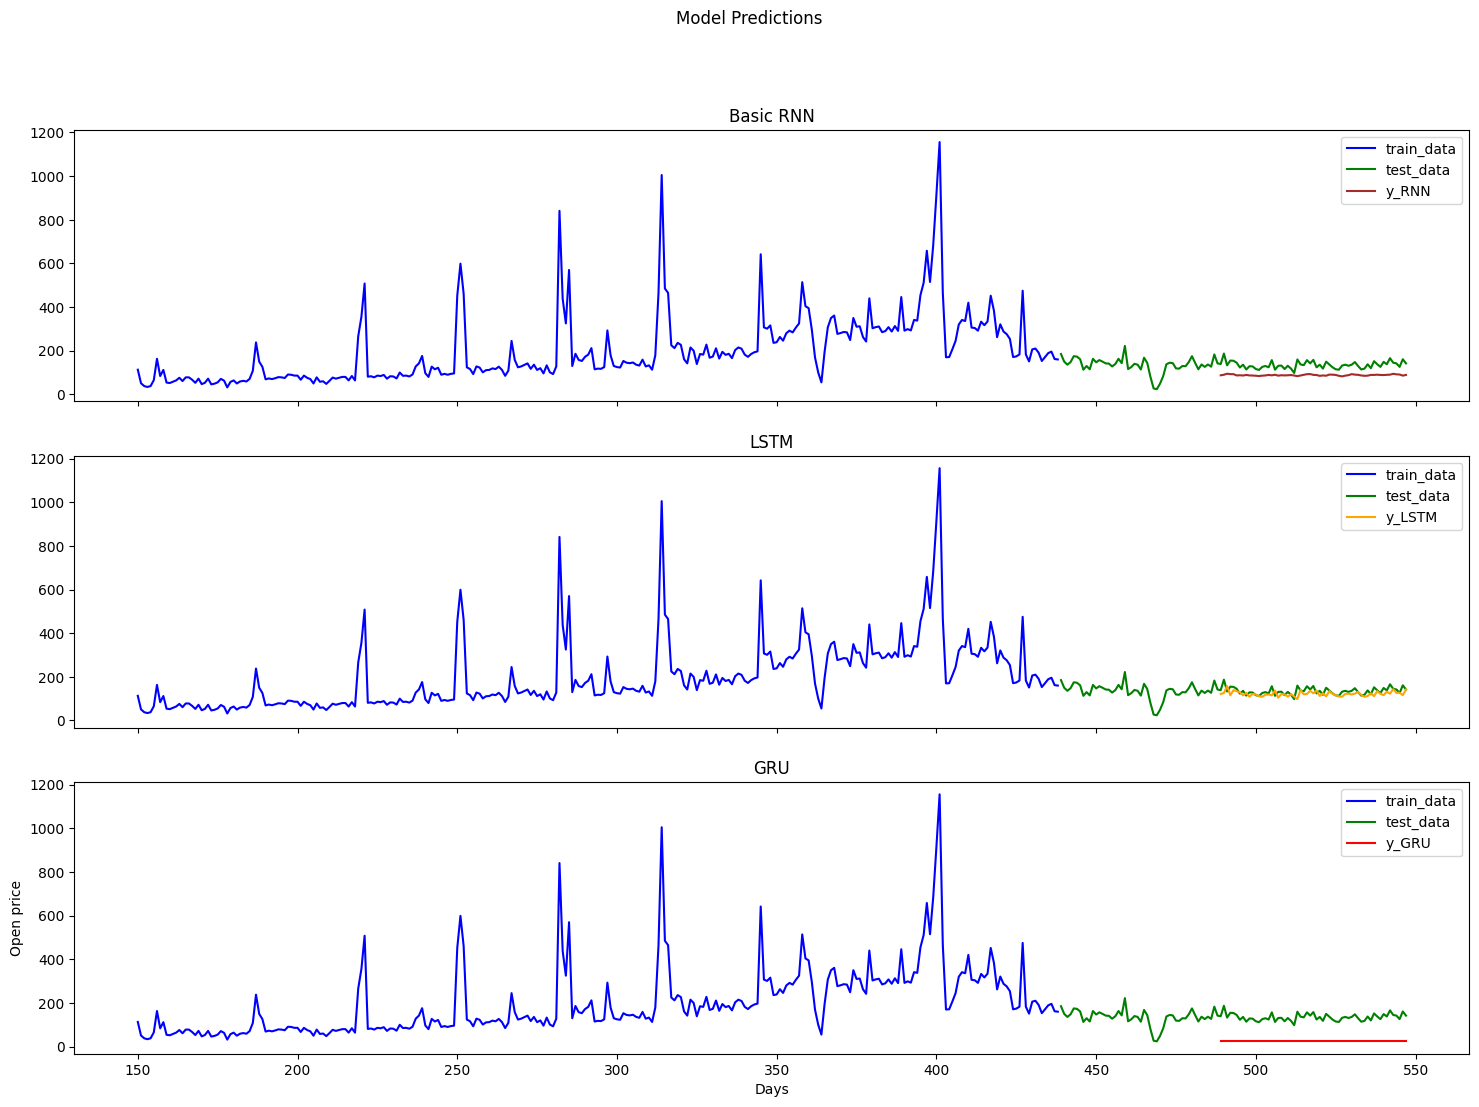

In [ ]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.unique_order_count[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.unique_order_count, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.unique_order_count[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.unique_order_count, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.unique_order_count[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.unique_order_count, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")
 
plt.xlabel("Days")
plt.ylabel("Open price")
 
plt.show()

In [ ]:
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             mean_absolute_percentage_error)
from math import sqrt


pred_dict = {"RNN":y_RNN_O,"LSTM":y_LSTM_O, "GRU":y_GRU_O}
y_true = test_data[50:].unique_order_count
# /  

for name, pred in pred_dict.items():
    mae = mean_absolute_error(y_true, pred)
    mse = mean_squared_error(y_true,pred)
    rmse = math.sqrt(mse)
    mape =mean_absolute_percentage_error(y_true,pred)
    print(f"==== {name} ====")
    print(f"MAE: {mae}")
    print(f"MSE {mse}")
    print(f"RMSE {rmse}")
    print(f"MAPE: {mape}\n")
# print(RNN_mae)

==== RNN ====
MAE: 46.26208961616128
MSE 2384.432543529513
RMSE 48.83065168036889
MAPE: 0.3351798389948878

==== LSTM ====
MAE: 16.722332970570708
MSE 512.4397180085899
RMSE 22.63713139972885
MAPE: 0.11682559013652116

==== GRU ====
MAE: 110.57627118644068
MSE 12488.338983050848
RMSE 111.7512370537832
MAPE: 0.8191421133575764



In [ ]:
model = regressor.save('train_regressorRNN_1Jul67.keras')
model = regressorLSTM.save('train_regressorLSTM_1Jul67.keras')
model = regressorGRU.save('train_regressorGRU_1Jul67.keras')